# Graduate Rotational Internship Program
# The Sparks Foundation ( Data Science & Business Analytics Tasks )

## Task 4 : Exploratory Data Analysis - Terrorism

**Objective : In this task As a security/defense analyst, try to find out the hot zone of terrorism..**

# Author : Ritik Kumar

In [1]:
## Imported Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('globalterrorism.csv')
pd.set_option('display.max_columns', None)

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
## lets drop id column

data.drop(['eventid'], axis=1, inplace=True)

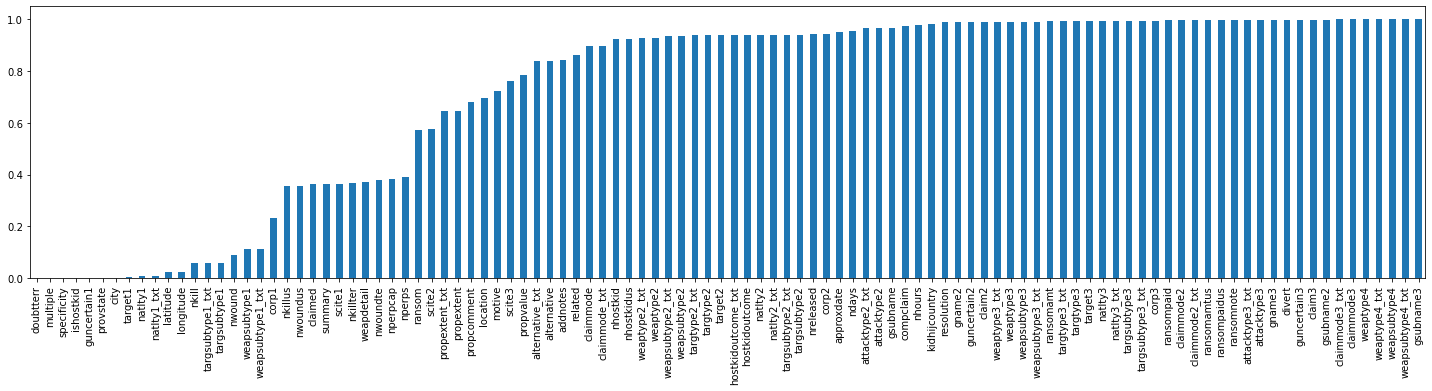

In [5]:
## Visualizing Missing Values 

plt.figure(figsize=(25,5))
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()

In [6]:
##This would drop any column with less than 90% non-NA values.

data.dropna(thresh=int(data.shape[0] * .9), axis=1, inplace=True)

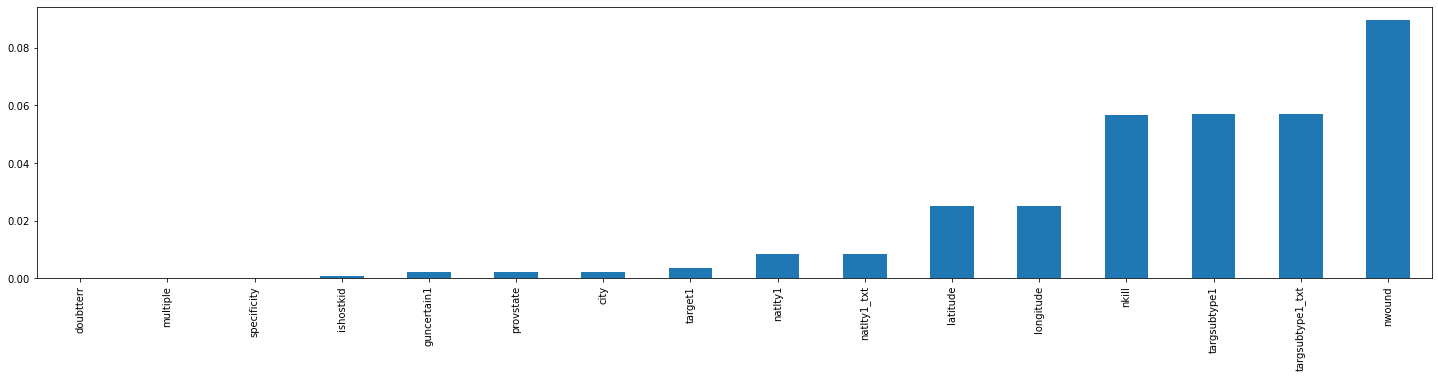

In [7]:
## Plotting missing values < 10%

plt.figure(figsize=(25,5))
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()

In [8]:
num = data.select_dtypes(exclude='object') ## Numerical Columns
cat = data.select_dtypes(include='object') ## Categorical Columns


In [9]:
## Basics statistical analysis and missing Values on numerical Columns.

display(num.head())
print('*'*100)
display(data.describe())
print('*'*100)
display(num.isnull().sum()/data.shape[0])


,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,2,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,14,68.0,58.0,0.0,0,13,1.0,0.0,0,0.0,0,0,0,0
1,1970,0,0,0,130,1,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,7,45.0,21.0,0.0,0,13,0.0,0.0,0,1.0,0,1,1,1
2,1970,1,0,0,160,5,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,10,54.0,217.0,0.0,0,13,1.0,0.0,0,0.0,-9,-9,1,1
3,1970,1,0,0,78,8,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,7,46.0,217.0,0.0,0,6,NaN,NaN,1,0.0,-9,-9,1,1
4,1970,1,0,0,101,4,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,7,46.0,217.0,0.0,0,8,NaN,NaN,1,0.0,-9,-9,1,1


****************************************************************************************************


,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,6.447325,2.403272,3.167668,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,2.173435,11.545741,35.949392,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,6.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****************************************************************************************************


iyear           0.000000
imonth          0.000000
iday            0.000000
extended        0.000000
country         0.000000
region          0.000000
latitude        0.025076
longitude       0.025081
specificity     0.000033
vicinity        0.000000
crit1           0.000000
crit2           0.000000
crit3           0.000000
doubtterr       0.000006
multiple        0.000006
success         0.000000
suicide         0.000000
attacktype1     0.000000
targtype1       0.000000
targsubtype1    0.057091
natlty1         0.008581
guncertain1     0.002091
individual      0.000000
weaptype1       0.000000
nkill           0.056761
nwound          0.089773
property        0.000000
ishostkid       0.000980
INT_LOG         0.000000
INT_IDEO        0.000000
INT_MISC        0.000000
INT_ANY         0.000000
dtype: float64

In [10]:
## Frequency of Categorical Data and missing Values in Categorical Columns

display(cat.head())
print('*'*100)
display(cat.describe(include='all'))
print('*'*100)
display(cat.isnull().sum()/data.shape[0])


,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,dbsource
0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,PGIS
1,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,PGIS
2,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,PGIS
3,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,PGIS
4,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,PGIS


****************************************************************************************************


,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,dbsource
count,181691,181691,181270,181257,181691,181691,171318,181055,180132,181691,181691,181691
unique,205,12,2854,36674,9,22,112,86006,215,3537,12,26
top,Iraq,Middle East & North Africa,Baghdad,Unknown,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Iraq,Unknown,Explosives,START Primary Collection
freq,24636,50474,7645,9775,88255,43511,11596,6461,24113,82782,92426,78002


****************************************************************************************************


country_txt         0.000000
region_txt          0.000000
provstate           0.002317
city                0.002389
attacktype1_txt     0.000000
targtype1_txt       0.000000
targsubtype1_txt    0.057091
target1             0.003500
natlty1_txt         0.008581
gname               0.000000
weaptype1_txt       0.000000
dbsource            0.000000
dtype: float64

In [11]:
## More info about dtypes in data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   extended          181691 non-null  int64  
 4   country           181691 non-null  int64  
 5   country_txt       181691 non-null  object 
 6   region            181691 non-null  int64  
 7   region_txt        181691 non-null  object 
 8   provstate         181270 non-null  object 
 9   city              181257 non-null  object 
 10  latitude          177135 non-null  float64
 11  longitude         177134 non-null  float64
 12  specificity       181685 non-null  float64
 13  vicinity          181691 non-null  int64  
 14  crit1             181691 non-null  int64  
 15  crit2             181691 non-null  int64  
 16  crit3             18

In [12]:
### Filling the missing Values
### Median to numerical columns and Mode to Categorical Columns

data = data.apply(lambda x:x.fillna(x.median()) if (x.dtype == 'float64' or x.dtype == 'int64') else x.fillna(x.value_counts().index[0]))

In [13]:
data.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

## Q1 Frequency of  Region and Counries ?

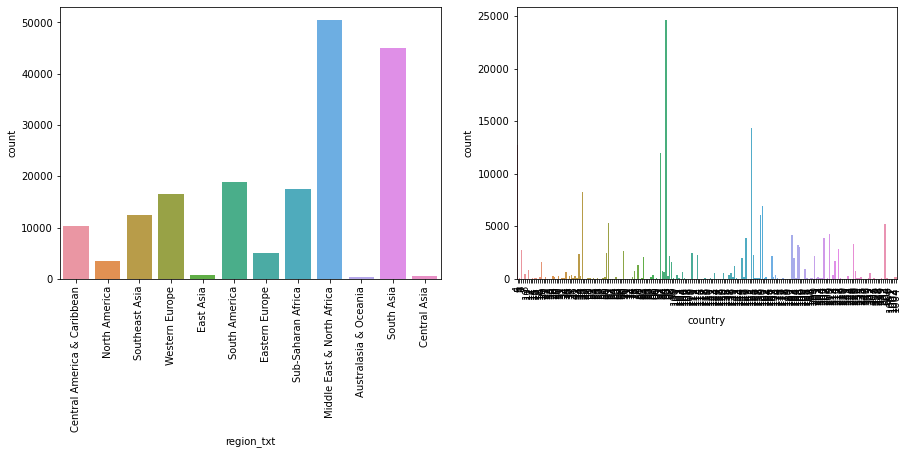

<Figure size 1440x576 with 0 Axes>

In [14]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.figure(figsize=(20,8))
g=sns.countplot(data['region_txt'], ax=ax[0])
plt.setp(g.get_xticklabels(), rotation=90)


h = sns.countplot(data['country'], ax=ax[1])
plt.setp(h.get_xticklabels(), rotation=90)
plt.show()

## Q2 City Where Mostly People Died?

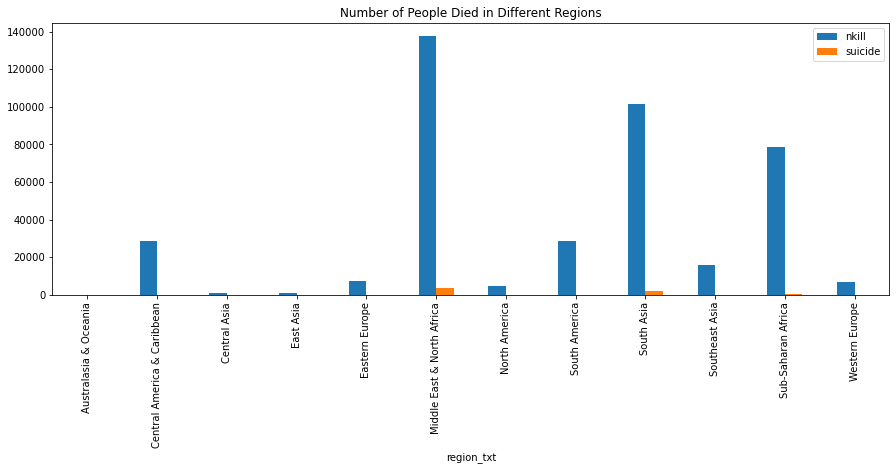

In [15]:


data.groupby('region_txt')['nkill','suicide'].sum().plot(kind='bar',figsize=(15,5))
plt.title('Number of People Died in Different Regions')
plt.show()

## Q3 Frequency of Attack Type And Target Type?

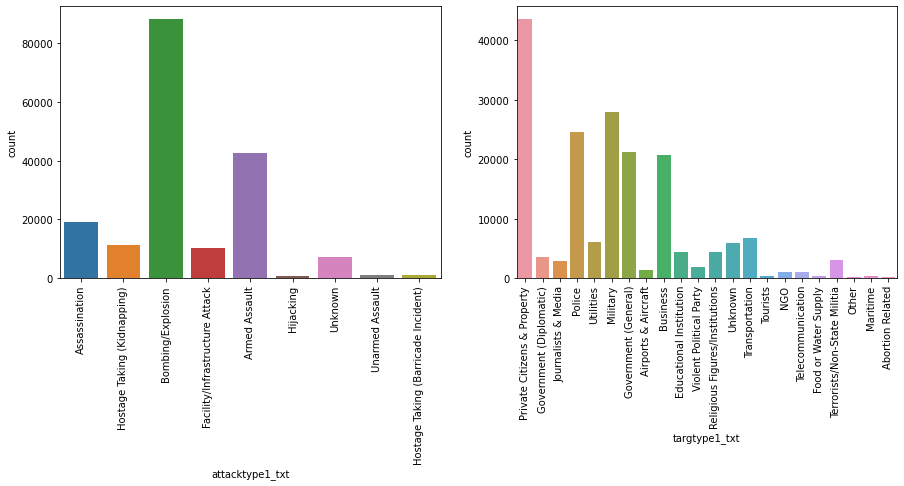

<Figure size 1440x576 with 0 Axes>

In [16]:

fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.figure(figsize=(20,8))
g=sns.countplot(data['attacktype1_txt'], ax=ax[0])
plt.setp(g.get_xticklabels(), rotation=90)


h = sns.countplot(data['targtype1_txt'], ax=ax[1])
plt.setp(h.get_xticklabels(), rotation=90)
plt.show()

## Q4 : Which Subject Was Mostly Targeted By Terrorists  and  Kill Mostly Peoples?

,targsubtype1_txt,nkill
0,Unnamed Civilian/Unspecified,54453.0
1,Village/City/Town/Suburb,40832.0
2,Military Unit/Patrol/Convoy,37414.0
3,"Military Personnel (soldiers, troops, officers...",26241.0
4,Military Barracks/Base/Headquarters/Checkpost,24789.0
5,Police Security Forces/Officers,21296.0
6,"Police Building (headquarters, station, school)",14150.0
7,Marketplace/Plaza/Square,11001.0
8,Religion Identified,9983.0
9,Place of Worship,9826.0


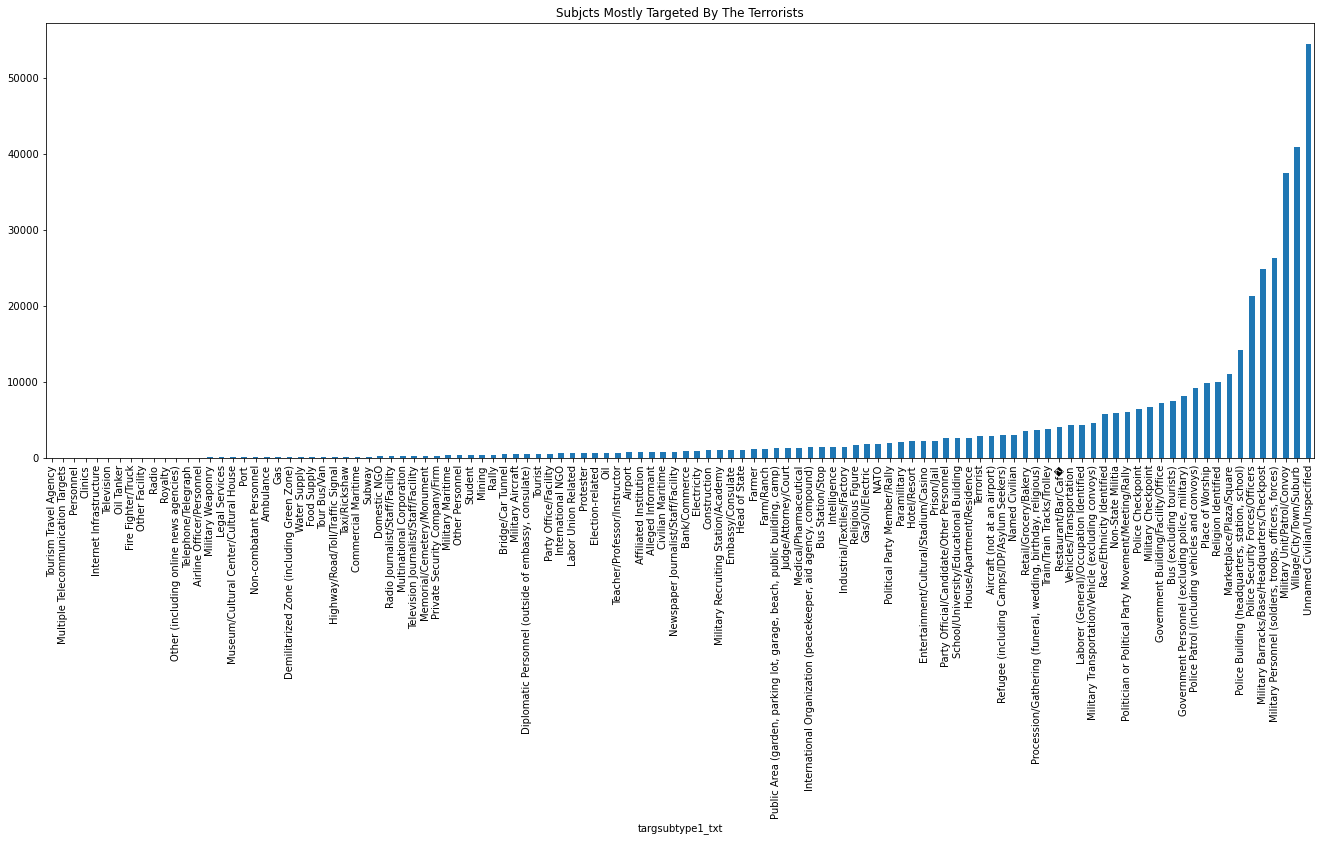

In [17]:
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
display(data.groupby('targsubtype1_txt')['nkill'].sum().sort_values().nlargest(10).reset_index())
data.groupby('targsubtype1_txt')['nkill'].sum().sort_values().plot.bar()
plt.title('Subjcts Mostly Targeted By The Terrorists')
plt.show()

## Q5 : How Many Attacks Was Successful and the Total Number of People Killed in those Attacks ?

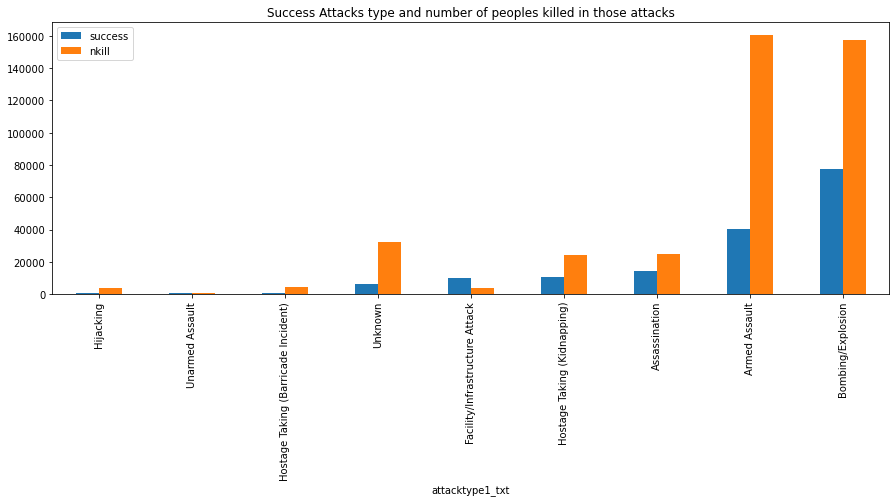

In [18]:

data.groupby('attacktype1_txt')['success','nkill'].sum().sort_values(by='success').plot(kind='bar',figsize=(15,5))
plt.title('Success Attacks type and number of peoples killed in those attacks')
plt.show()



## Q 6 Different Weapons Type Attacks Which was Successful and the Total Number of People Killed and Wounded in those Attacks .

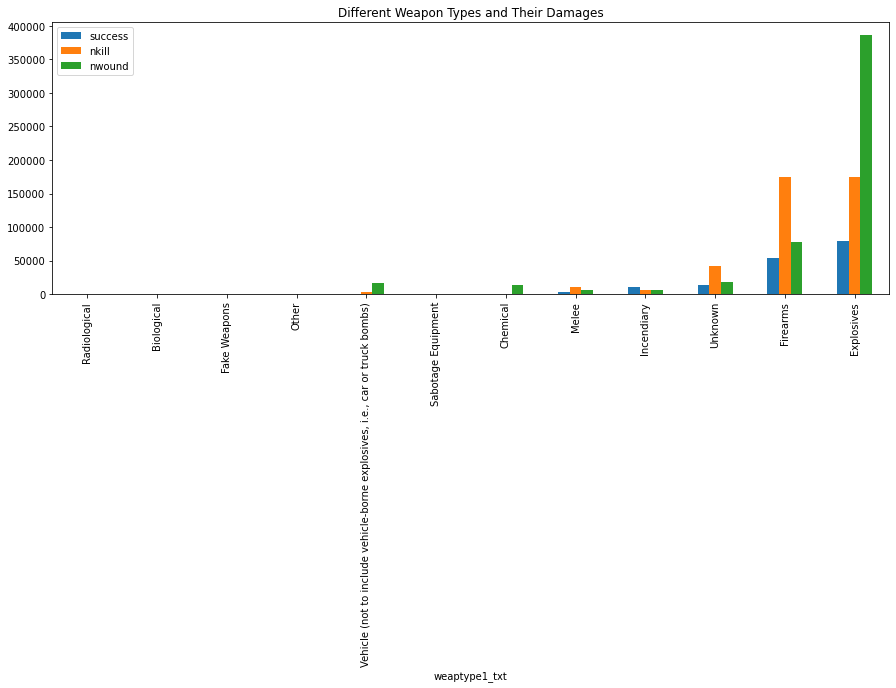

In [19]:

data.groupby('weaptype1_txt')['success','nkill','nwound'].sum().sort_values(by='success').plot(kind='bar',title='Different Weapon Types and Their Damages',figsize=(15,5));


## Q7 Which Country is Most Affected and Number of Peoples  Died because of Terrorsits Attack?

,country_txt,nkill,nwound
0,Iraq,78589.0,134690.0
1,Afghanistan,39384.0,44277.0
2,Pakistan,23822.0,42038.0
3,Nigeria,22682.0,10239.0
4,India,19341.0,28980.0
5,Sri Lanka,15530.0,15561.0
6,Syria,15229.0,14109.0
7,Colombia,14698.0,10328.0
8,Peru,12771.0,4078.0
9,El Salvador,12053.0,5062.0


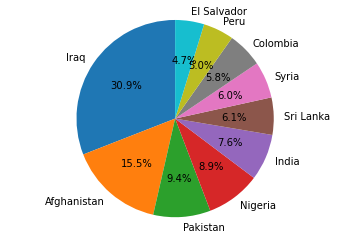

In [20]:


display(data.groupby('country_txt')['nkill','nwound'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').reset_index())
df = data.groupby('country_txt')['nkill'].sum().sort_values().nlargest(10)
df = pd.DataFrame({'Country':df.index, 'Kill':df})
plt.pie(df['Kill'], labels=df.index, shadow=False, startangle=90, autopct='%1.1f%%',) 
plt.axis('equal') 
plt.show()




## Q8 In Which Year Mostly Number of Peoples Died  and Wounded because of Terrorsits Attack?

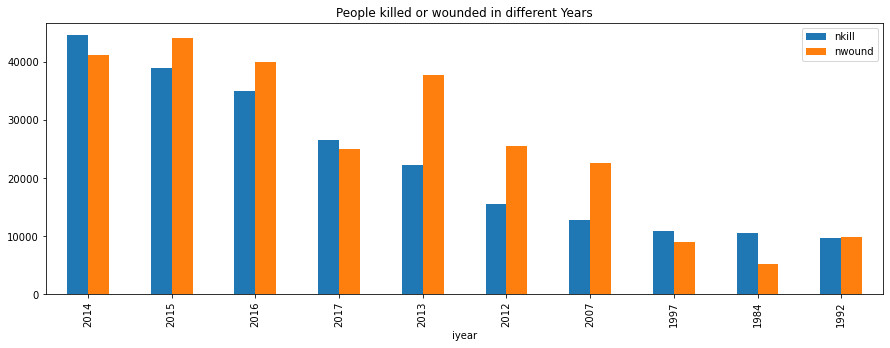

In [21]:
data.groupby('iyear')['nkill','nwound'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(15,5))
plt.title('People killed or wounded in different Years')
plt.show()

## Q9 Loss in Property  and Life in different Countries and Region  ?

Text(0.5, 1.0, 'Loss In Property and Life in Different Regions')

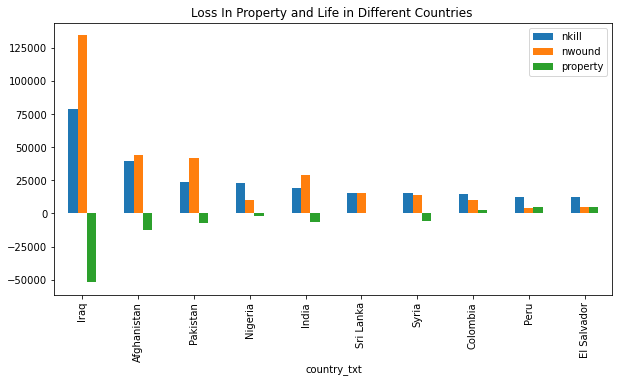

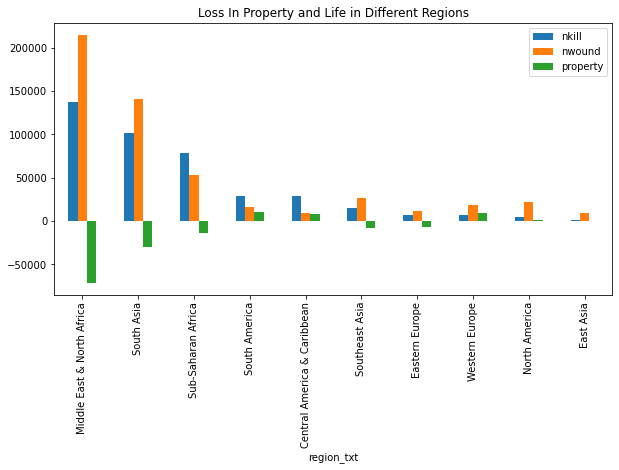

In [22]:


data.groupby('country_txt')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(10,5));
plt.title('Loss In Property and Life in Different Countries ')


data.groupby('region_txt')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(10,5));
plt.title('Loss In Property and Life in Different Regions')

## 10 Different  Types  of Attacks and Loss in these Attacks?

,attacktype1_txt,nkill,nwound,property
0,Armed Assault,160297.0,77366.0,-26530
1,Bombing/Explosion,157321.0,372686.0,-61732
2,Unknown,32381.0,14725.0,-7250
3,Assassination,24920.0,13887.0,-6142
4,Hostage Taking (Kidnapping),24231.0,6446.0,-4910
5,Hostage Taking (Barricade Incident),4478.0,3966.0,448
6,Hijacking,3718.0,17001.0,-42
7,Facility/Infrastructure Attack,3642.0,3765.0,7257
8,Unarmed Assault,880.0,14027.0,-40


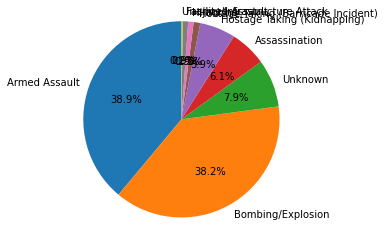

In [23]:
display(data.groupby('attacktype1_txt')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').reset_index())
df = data.groupby('attacktype1_txt')['nkill'].sum().sort_values().nlargest(10)
df = pd.DataFrame({'Country':df.index, 'Kill':df})
plt.pie(df['Kill'], labels=df.index, shadow=False, startangle=90, autopct='%1.1f%%',) 
plt.axis('equal') 
plt.show()


##  11. Visualizing the Top Countries States Suffered From Terrorists Attacks.

,provstate,nkill,nwound,property
0,Baghdad,22348.0,57760.0,-22153
1,Unknown,15476.0,7601.0,1515
2,Nineveh,15185.0,11323.0,-5191
3,Borno,12063.0,4014.0,-1178
4,Al Anbar,12009.0,11087.0,-4566
5,Saladin,10673.0,14609.0,-5518
6,Diyala,7779.0,14138.0,-6643
7,Eastern,6323.0,5028.0,-343
8,Northern,5955.0,3887.0,-366
9,Punjab,5452.0,9392.0,258


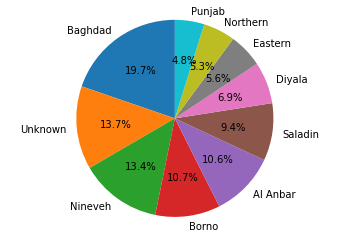

In [24]:
display(data.groupby('provstate')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').reset_index())
df = data.groupby('provstate')['nkill'].sum().sort_values().nlargest(10)
df = pd.DataFrame({'provstate':df.index, 'Kill':df})
plt.pie(df['Kill'], labels=df.index, shadow=False, startangle=90, autopct='%1.1f%%',) 
plt.axis('equal') 
plt.show()


## 12. Correlation Between Columns

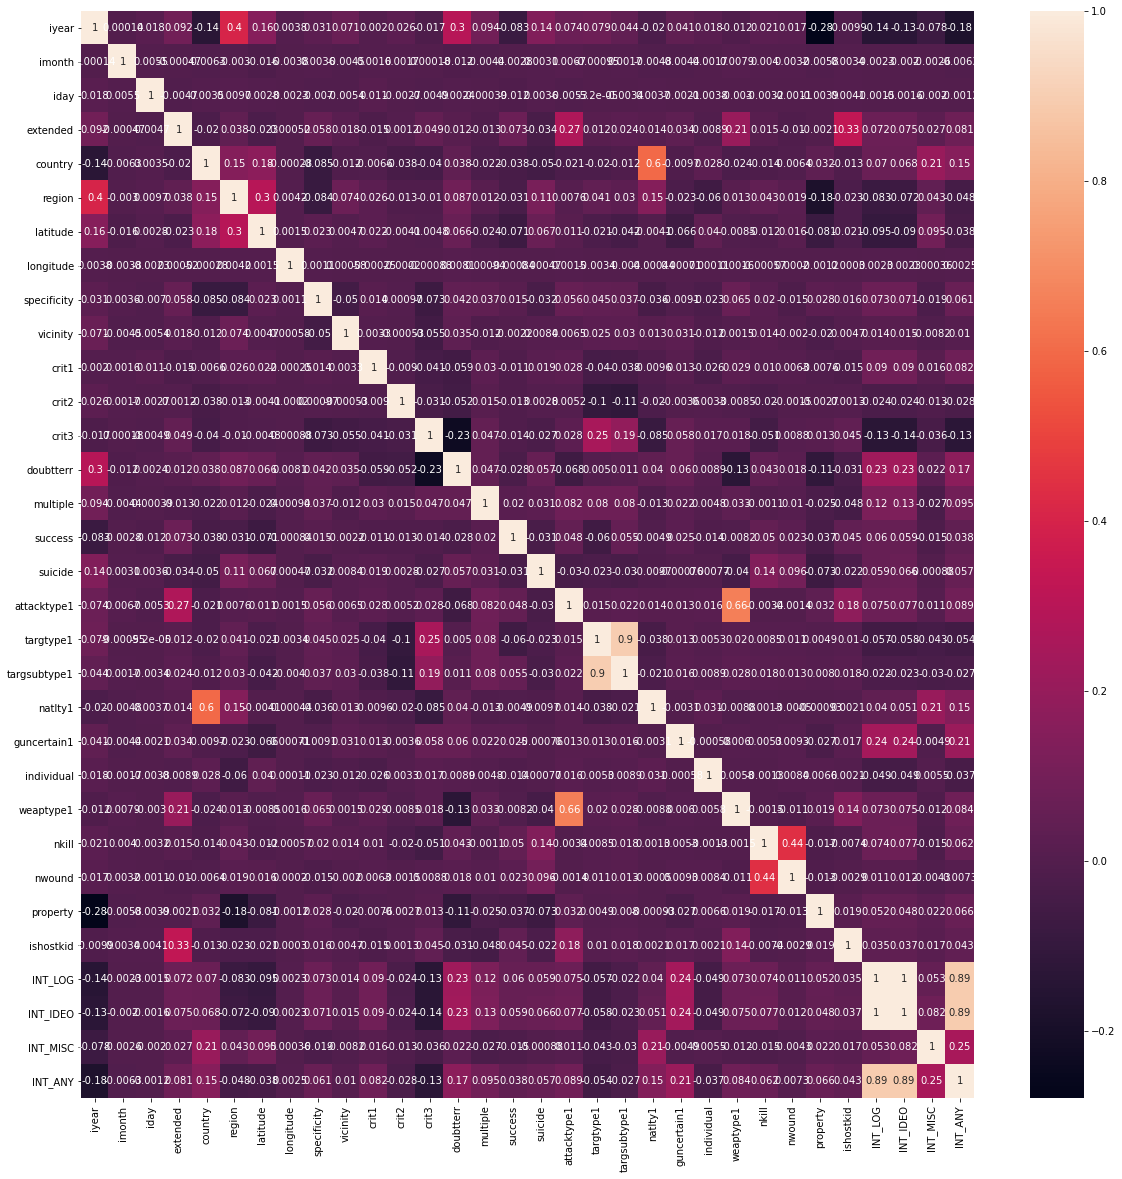

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Thank You